In [1]:
# 1/20/2020 20 threads, 40G
    #read csv: wall time: 7min 45s
    #read dta: Wall time: 1h 3min 45s
    
# 1/21/2020 20 threads, 100G
    #read csv: Wall time: 5min 48s
    #read dta: Wall time: 37min 3s
    
# 1/21/2020 1:54PM, 20 threads, 100G
    #read csv: Wall time: 8min 16s
    #read dta: Wall time: 

In [82]:
import json
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 20)
!date

Thu Feb  6 12:33:04 PST 2020


# 2010 census demo data -- looking at distriubution of pop counts at the county level

In [3]:
location_cols = ['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK']

aian_cols = ['P0030005','P0060004'] # AIAN alone, AIAN combo
black_cols = ['P0030003','P0060003'] #black alone, black combo
elder = ['P0120025'] #85+ years
keep_cols = location_cols + black_cols + aian_cols + elder

def my_cols(x):
    if x.startswith('P001'):
        return True
    elif x.startswith(('AIAN','AITS','TTRACT','TBLGRP','UA','UR')):
        return True
    else:
        return (x in keep_cols)

In [4]:
%%time

df_dp = pd.read_csv('/home/j/temp/abie/fiftystates2010dhc.csv', usecols=my_cols)

<string>:2: DtypeWarning: Columns (28,32,33,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 6min 56s, sys: 27.2 s, total: 7min 23s
Wall time: 7min 39s


In [5]:
dta_columns = [x.lower() for x in df_dp.columns] #grab col names as lowercase
dta_columns[-6:] = [x.upper() for x in dta_columns[-6:]] #coded vars are capitalized

In [6]:
#checkout how close the distribution of these vars are to AIAN alone
#P0030003 = black alone
#P0120025 = 85+ year olds
#P0030005 = AIAN alone
df_dp[['P0030003','P0120025','P0030005']].describe()

,P0030003,P0120025,P0030005
count,1.371779e+07,1.371779e+07,1.371779e+07
mean,1.566265e+02,7.027128e+00,6.094926e+01
std,8.249752e+03,3.286513e+02,5.442057e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00
max,3.073882e+06,2.104250e+05,4.861033e+06


In [7]:
#checkout population sums
df_dp[['P0030003','P0120025','P0030005']].sum()

P0030003    2148570564
P0120025      96396696
P0030005     836089386
dtype: int64

In [8]:
#%%time
#
# r = pd.read_stata('/home/j/temp/abie/all50states_2010ur1_all_vars.dta', columns=dta_columns,
#                   chunksize=100_000, convert_missing=True, preserve_dtypes=False)

# df_sf = pd.DataFrame()
# for t in r:
#     print('.', flush=True, end=' ')
#     df_sf = df_sf.append(t[t.block != ''])
# df_sf.shape

# saved AIAN-relevant vars here; loads faster than the .dta
df_sf = pd.read_csv('/home/j/temp/beatrixh/2020_census/elderly_black_aian_census2010.csv')

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# df_sf.to_csv(r'/home/j/temp/beatrixh/2020_census/elderly_black_aian_census2010.csv', index = None, header=True)

In [10]:
df_sf.columns = [x.upper() for x in df_sf.columns]

In [11]:
#store columns by type
float_cols = list(df_dp.loc[:, df_dp.dtypes == np.float64].columns)
int_cols = df_dp.loc[:, df_dp.dtypes == np.int64].columns

#conver df_sf to correct dtypes
df_sf.loc[:,float_cols] = df_sf.loc[:,float_cols].astype(np.float64)
df_sf.loc[:,int_cols] = df_sf.loc[:,int_cols].astype(np.int64)

In [14]:
count_vars = list(df_sf.columns[[x.startswith("P0") for x in df_sf.columns]])

In [13]:
left = df_sf[keep_cols + ['P0010001']]
df = pd.merge(left[(left.BLOCK != '')], df_dp.dropna(subset=['BLOCK']), left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [158]:
# how many counties are there?
df.groupby(['STATE','COUNTY']).size()

STATE  COUNTY
1      1.0       1887
       3.0       8628
       5.0       1820
       7.0       1777
       9.0       2750
                 ... 
56     37.0      5305
       39.0      2501
       41.0      2652
       43.0      1902
       45.0      2244
Length: 3142, dtype: int64

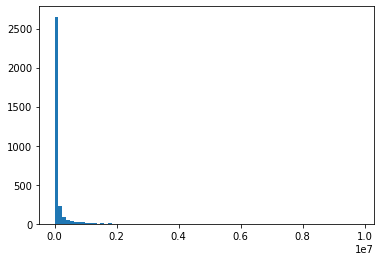

3142

In [262]:
# distribution of county size by all population

plt.hist(county_df.P0010001_SF, bins = 80)
plt.show()

len(county_df.P0010001_SF)

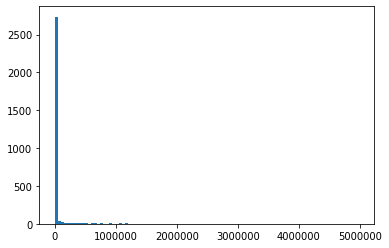

array([5.35097570e-004, 3.89248838e-003, 1.63179428e-159, ...,
       1.75278926e-031, 3.37626391e-037, 2.19553907e-035])

In [263]:
x_i = np.random.beta(.02, 1, 3000)
x_i *= 5e6

plt.hist(x_i, bins = 100)
plt.show()
x_i

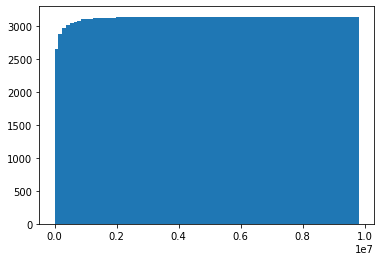

In [265]:
# cdf of county size by all population

plt.hist(county_df.P0010001_SF, bins = 80, cumulative=True)
plt.show()

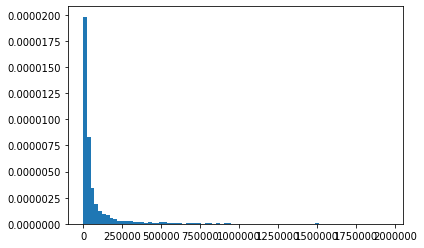

In [266]:
# pdf of county size by all population, zoom in

plt.hist(county_df[county_df.P0010001_SF < 2e6].P0010001_SF, bins = 80, density=True)
plt.show()

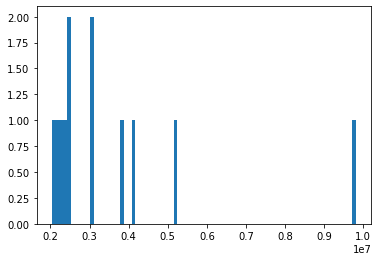

In [267]:
# distribution of county size by all population, zoom in on tail

plt.hist(county_df[county_df.P0010001_SF > 2e6].P0010001_SF, bins = 80)
plt.show()

In [236]:
# how big are these?
df[['P0010001_SF','P0030005_SF','P0010001_DP','P0030005_DP']].sum()

P0010001_SF    308143815
P0030005_SF     14653196
P0010001_DP    308143815
P0030005_DP     14651470
dtype: int64

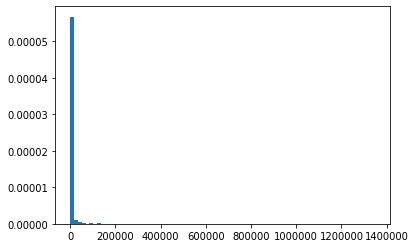

In [238]:
# distribution of AIAN alone

plt.hist(county_df.P0030005_SF, bins = 80, density = True)
plt.show()

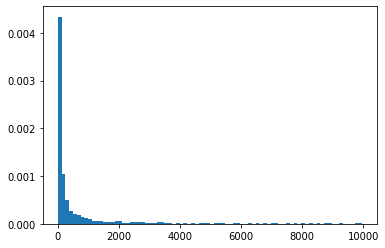

In [239]:
# distribution of AIAN alone; zoomed in

plt.hist(county_df[(county_df.P0030005_SF < 1e4) & (county_df.P0030005_SF > 1)].P0030005_SF, bins = 80, density = True)
plt.show()

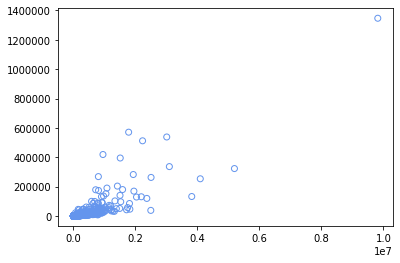

In [268]:
# are AIAN and total population sizes independent?

x = county_df.P0010001_SF
y = county_df.P0030005_SF

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x,y, facecolors = 'none', edgecolors = 'cornflowerblue')

plt.show()

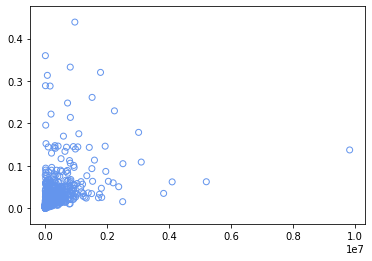

In [269]:
# are AIAN and total population sizes independent?

county_df['aian_prop'] = county_df['P0030005_SF'] / county_df['P0010001_SF']

x = county_df.P0010001_SF
y = county_df.aian_prop

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x,y, facecolors = 'none', edgecolors = 'cornflowerblue')

plt.show()

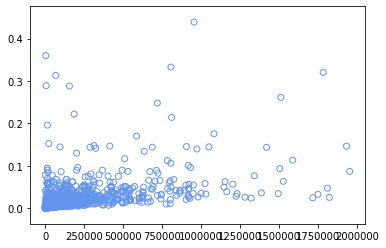

In [243]:
# are AIAN and total population sizes independent?
# zoom in

county_df['aian_prop'] = county_df['P0030005_SF'] / county_df['P0010001_SF']

x = county_df[county_df.P0010001_SF < 2e6].P0010001_SF
y = county_df[county_df.P0010001_SF < 2e6].aian_prop

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x,y, facecolors = 'none', edgecolors = 'cornflowerblue')

plt.show()

In [270]:
# check out correlation

x = county_df.P0010001_SF

cov = np.cov(x, county_df.aian_prop)
print(cov)
print(f'pearson\'s: {3.52994391e3/(np.std(county_df.P0010001_SF)*np.std(county_df.aian_prop))}')

[[9.78575999e+10 3.52994391e+03]
 [3.52994391e+03 6.28003291e-04]]
pearson's: 0.4504305196801542


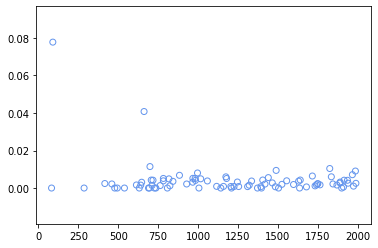

In [271]:
# are AIAN and total population sizes independent?
# zoom in

county_df['aian_prop'] = county_df['P0030005_SF'] / county_df['P0010001_SF']

x = county_df[county_df.P0010001_SF < 2e3].P0010001_SF
y = county_df[county_df.P0010001_SF < 2e3].aian_prop

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x,y, facecolors = 'none', edgecolors = 'cornflowerblue')

plt.show()

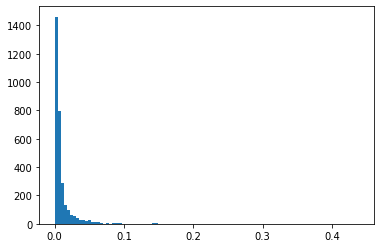

In [272]:
# distribution of AIAN prop

plt.hist(county_df.aian_prop, bins = 100)
plt.show()

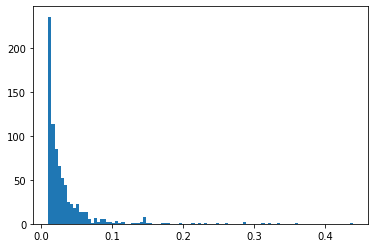

In [273]:
# distribution of AIAN prop

plt.hist(county_df[county_df.aian_prop>1e-2].aian_prop, bins = 100)
plt.show()

## todo: stacked bar graph.
## also figure out what the distribution of population is within urban/rural areas, and reservations

In [274]:
df.columns

Index(['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'P0030003_SF',
       'P0060003_SF', 'P0030005_SF', 'P0060004_SF', 'P0120025_SF',
       'P0010001_SF', 'AIANHH', 'AIANHHFP', 'AIANHHCC', 'AITSCE', 'AITS',
       'AITSCC', 'TTRACT', 'UA', 'UASC', 'UATYPE', 'UR', 'AIANHHNS', 'AITSNS',
       'AIANHHSC', 'P0010001_DP', 'P0030003_DP', 'P0030005_DP', 'P0060003_DP',
       'P0060004_DP', 'P0120025_DP'],
      dtype='object')

In [275]:
urban = df[df.UR=='U'].groupby(['STATE','COUNTY'])['P0010001_SF','P0010001_DP',
                                                   'P0030005_SF','P0030005_DP'].apply(lambda x : x.astype(int).sum())
rural = df[df.UR=='R'].groupby(['STATE','COUNTY'])['P0010001_SF','P0010001_DP',
                                                   'P0030005_SF','P0030005_DP'].apply(lambda x : x.astype(int).sum())

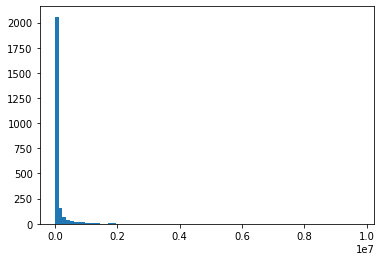

In [276]:
# distribution of county size, urban

plt.hist(urban.P0010001_SF, bins=80)
plt.show()

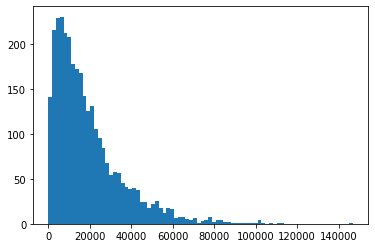

In [277]:
# distribution of county size, rural

plt.hist(rural.P0010001_SF, bins=80)
plt.show()

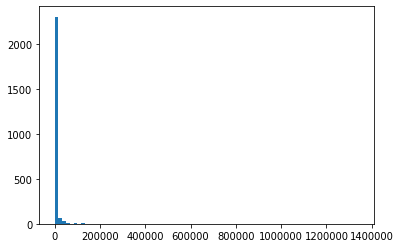

In [278]:
# distribution of county aian pop, urban

plt.hist(urban.P0030005_SF, bins=80)
plt.show()

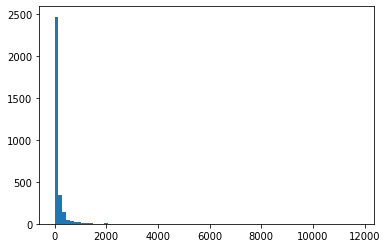

In [257]:
# distribution of county aian pop, rural

plt.hist(rural.P0030005_SF, bins=80)
plt.show()

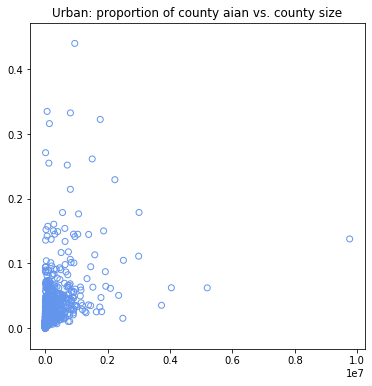

In [259]:
# prop of county aian vs. county size

urban['aian_prop'] = urban['P0030005_SF'] / urban['P0010001_SF']

x = urban.P0010001_SF
y = urban.aian_prop

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

plt.title('Urban: proportion of county aian vs. county size')

plt.show()

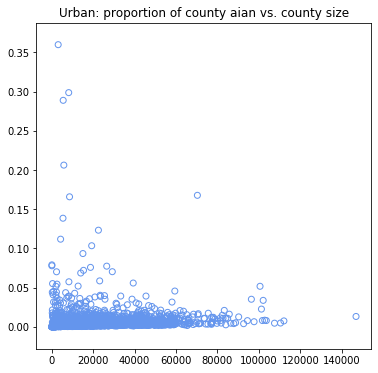

In [279]:
# prop of county aian vs. county size

rural['aian_prop'] = rural['P0030005_SF'] / rural['P0010001_SF']

x = rural.P0010001_SF
y = rural.aian_prop

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

plt.title('Urban: proportion of county aian vs. county size')

plt.show()